#***Pytorch workflow***

1. Get Data ready & Turn it into tensors
2. build or pick pretraind model :- Pick a loss func. optimizer , Build a training loop
3. Fit the model to the data and make predictions
4. Evaluate the model
5. improve through experimentationn
6. save and reload your trained model



In [78]:
import torch
from torch import nn #nn contains all of the building blocks
import matplotlib.pyplot as plt

In [79]:
#Data prepairing and loading
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# spliting data into training and test sets

In [80]:
#create train test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [81]:
def plot_predictions(train_data=X_train.cpu(), # Added .cpu() to move data to CPU
                     train_labels=y_train.cpu(), # Added .cpu() to move data to CPU
                     test_data=X_test.cpu(), # Added .cpu() to move data to CPU
                     test_labels=y_test.cpu(), # Added .cpu() to move data to CPU
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

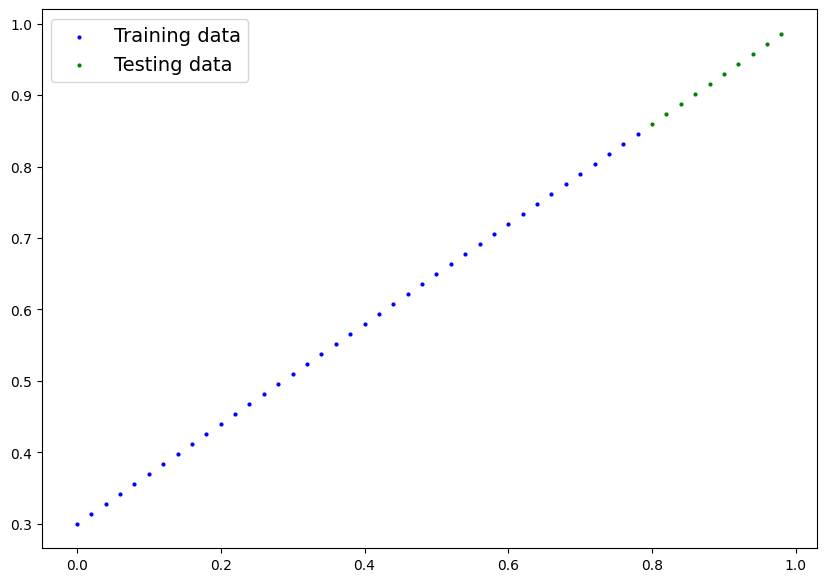

In [82]:
plot_predictions()


# **Build model**

> * start with random values
> * look at training data and adjust random values to better represent the ideal values

# ALGORITHMS
> * Gradient decent
> * Back propogation

In [83]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula




# **Py torch model building essentials**


*   torch.nn - contains all of the buildings for computatinoal graphs ( another word for neural network can be considered a computatiniol)
*   torch.nn.parameter - what perameters should a model try and learn , often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules , if you subclass it, you should overwrite forword()

* torch.optim - this where the optimizer in pytorch live, they will help with gradient decent


* def forword() - All nn module subclasses require you to overwrite forword this define that what happens in forword computation
* Torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.DataLoader
* torchvision.modules
* torchmatrics




In [84]:
#cheaking Contents of our pytorch model
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [85]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [86]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [87]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

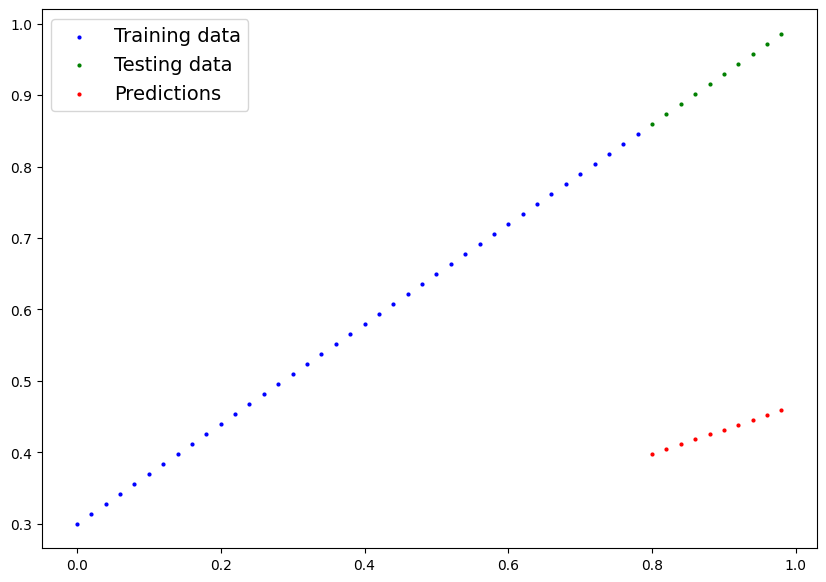

In [88]:
plot_predictions(predictions=y_preds)

# Train model
The whole idea of training is for a model to move from some *unknown* parameters (thease may be random) to some *known* parameters.

or in other words from a poor representation of the data to a better representation of the data.

one way to meassure how poor a models prediction are is to use loss function.

Things we need to train a model:

* **Loss function :** A function to measure how wrong your model's predictions are to the ideal outputs

* **Optimizer :** take into account of a model and adjust the model's parameters ( e.g. weight & bias in our case to improve loss function )

And specifically for PyTorch we need:


*   A training loop
*   A testing loop



In [89]:
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [91]:
# setup a loss function
loss_fn = nn.L1Loss() # <- mean absolute error

# setup an optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)# <- parameters of our model and learning rate

# building a training loop and a testing loop

0. Loop through the data
1. forword pass
2. Calculate the loss (compare forword passs prediction to ground truth labels)
3. Optimizer zero grad
4. loss backwords - move backwords through the network to calculate the gradients of each of the Parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust model Parameters to try and improve the loss

In [92]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# loop through data
for epoch in range(epochs):
  model_0.train() # train mode in pytorch sets all peram. that reqire grad to require gradients

  # 1. Forword pass:
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  #3 Optimizer zero grad
  optimizer.zero_grad()

  #4 back Propogation
  loss.backward()

  #step the optimizer
  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    y_preds = model_0(X_test)

    test_loss = loss_fn(y_preds, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


y_preds


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [93]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

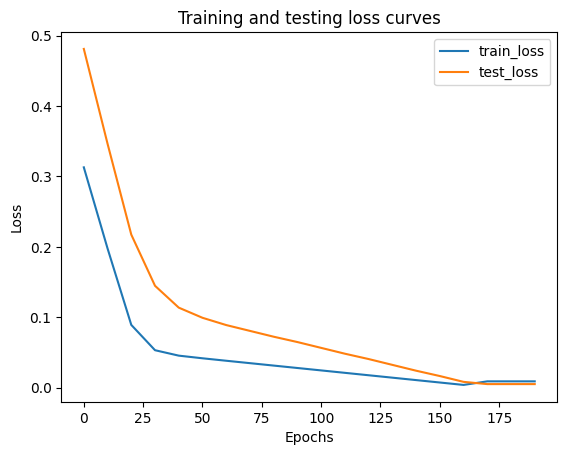

In [94]:
plt.plot(epoch_count, [loss.detach().numpy() for loss in loss_values], label="train_loss") # convert the tensors to numpy arrays
plt.plot(epoch_count, [loss.detach().numpy() for loss in test_loss_values], label="test_loss") # convert the tensors to numpy arrays
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

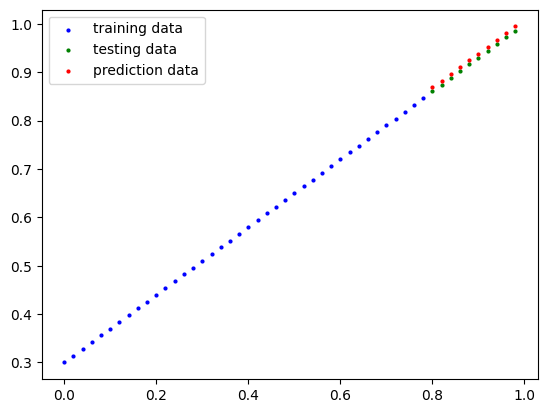

In [95]:
plt.scatter(X_train, y_train, c="b", s=4, label="training data")
plt.scatter(X_test, y_test, c="g", s=4, label="testing data")
plt.scatter(X_test, y_preds.detach().numpy(), c="r", s=4, label="prediction data")
plt.legend()
plt.show()

# Saving and loading Model

***There are three main method to save and load model***
* torch.save() - allows you to save a pytorch obj in pickle format
* torch.load() - allows us to load model
* torch.nn.Module.load_state_dict() - this allows to load model's saved state dictinory

In [96]:
#Saving pytorch model
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model.pth


# Loading the model
Since we saved our model's `state_dict()` rather then  entire model we'll create a new instance of our model class and load the saved `state_dict()` into that

In [97]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [98]:
# to load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
#Load the saved state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-98-fe17f93a91aa>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [99]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [100]:

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [101]:
#compare loaded model preds with original model preds

y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Building pytorch linear model

In [102]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [103]:
#cheak mode curr device
next(model_1.parameters()).device

device(type='cpu')

In [104]:
model_1.to(device="cuda")
next(model_1.parameters()).device

device(type='cuda', index=0)

# Training

*For taraining we need:*

* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [105]:
#setup loss function
loss_fn = nn.L1Loss()

#setup optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [106]:
# Training loop

torch.manual_seed(42)

epochs = 200

# put data on the target device

X_train = X_train.to(device="cuda")
y_train = y_train.to(device="cuda")
X_test = X_test.to(device="cuda")
y_test = y_test.to(device="cuda")

for epoch in range(epochs):
  model_1.train()
  #1 forward pass
  y_pred = model_1(X_train)

  #2 Calculating loss
  loss = loss_fn(y_pred, y_train)

  #3 Optimizer zero grad
  optimizer.zero_grad()

  # 4 Back propogation
  loss.backward()

  # Optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [107]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

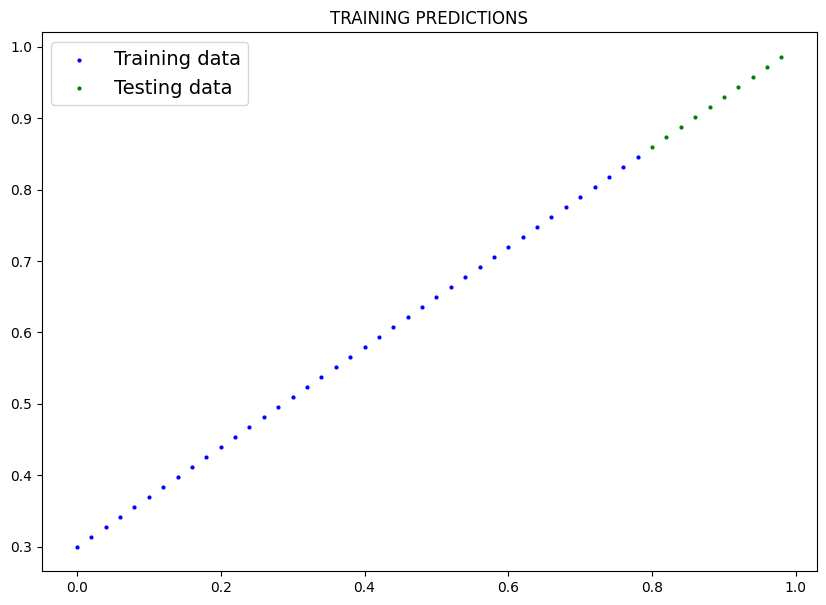

In [108]:
plot_predictions()
plt.title("TRAINING PREDICTIONS")
plt.show()

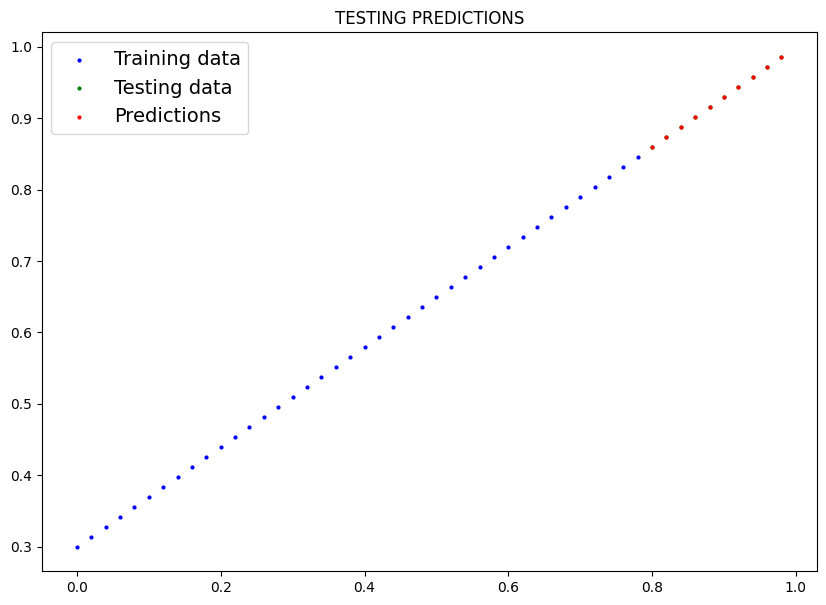

In [109]:
plot_predictions(predictions=model_1(X_test).cpu().detach().numpy())
plt.title("TESTING PREDICTIONS")
plt.show()